In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import json

data = []
with open("laser.txt") as f:
    for line in f:
        data.append(json.loads(line))
print("Length of data",len(data))

Length of data 4317


In [3]:
laser_values = []
timestamps = []

for elem in data:
    for key in elem:
        timestamps.append(key)
        laser_values.append(np.array(elem[key])[:,0].tolist())

In [4]:
lvalues = laser_values[10]

In [ ]:
for timestamp in timestamps:
    jpgfile1 = "images/"+timestamp+"_camera1.png"
    jpgfile2 = "images/"+timestamp+"_camera2.png"
    
    files = [jpgfile1,jpgfile2]
    w, h = img.size
    result = Image.new("RGB", (2*w, h))
    path = os.path.expanduser(file)
    img = Image.open(path)
    #img.thumbnail((400, 400), Image.ANTIALIAS)
    #x = index // 2 * 400
    #y = index % 2 * 400
    #w, h = img.size
    #print('pos {0},{1} size {2},{3}'.format(x, y, w, h))
    
    path = os.path.expanduser(files[0])
    img = Image.open(path)
    w, h = img.size
    result.paste(img, (0, 0))
    
    path = os.path.expanduser(files[1])
    img = Image.open(path)
    w, h = img.size
    result.paste(img, (w, 0))
    
    result.save('images_concat/'+timestamp+".png")

In [5]:
X = [] 
for timestamp in timestamps:
    path = "images_concat/"+timestamp+".png"  
    image = Image.open(path)
    X.append(np.array(image))
X = np.array(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, laser_values, test_size=0.33, random_state=42)

In [7]:
max_review_length = 201
#y_train = sequence.pad_sequences(y_train, maxlen=201)
#y_test = sequence.pad_sequences(y_test, maxlen=201)
length = len(sorted(y_train,key=len, reverse=True)[0])
y_train=np.array([xi+[0]*(length-len(xi)) for xi in y_train])
length = len(sorted(y_test,key=len, reverse=True)[0])
y_test=np.array([xi+[0]*(length-len(xi)) for xi in y_test])

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=(240, 640, 3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4),strides=(4, 4)))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(201))
model.compile(loss='mean_absolute_error', optimizer='Adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 236, 636, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 159, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 155, 64)       51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 34, 128)        204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 17, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8704)              0         
__________

In [9]:
# class NBatchLogger(keras.callbacks.Callback):
#     def __init__(self,display=100):
#         '''
#         display: Number of batches to wait before outputting loss
#         '''
#         self.seen = 0
#         self.display = display
#         #self.x = X_train
#         #self.y = y_train

#     def on_batch_end(self,batch,logs={}):
#         self.seen += logs.get('size', 0)
#         if self.seen % self.display == 0:
#             #loss, acc = self.model.evaluate(x, y, verbose=0)
#             #print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
#             model = self.model
#             print("Loss:",model.get_losses_for())
#             #history.append(loss)

In [10]:
history = model.fit(X_train, y_train ,batch_size=50, epochs=50,verbose=1)
print(history)
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

Epoch 1/50
2892/2892 [==============================] - 27s 9ms/step - loss: 0.7216
Epoch 2/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0537
Epoch 3/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0435
Epoch 4/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0395
Epoch 5/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0376
Epoch 6/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0405
Epoch 7/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0335
Epoch 8/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0316
Epoch 9/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0302
Epoch 10/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0323
Epoch 11/50
2892/2892 [==============================] - 19s 7ms/step - loss: 0.0284
Epoch 12/50
2892/2892 [==============================] - 19s 7ms/step - lo

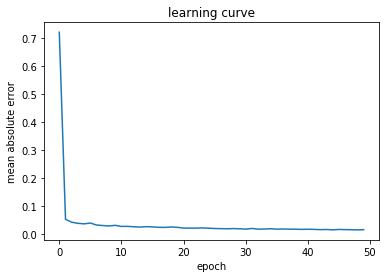

In [12]:
plt.plot(range(50),history.history['loss'],)
plt.title('learning curve')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.show()

In [13]:
model.evaluate(X_test, y_test)

NameError: name 'X_test' is not defined

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot
from keras.utils import plot_model
plot_model(model, to_file='model.png')

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

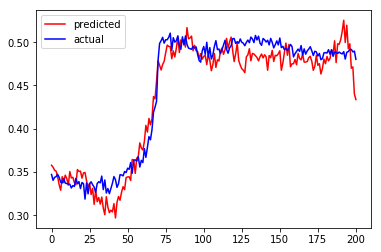

In [14]:
num = 280
plt.plot(model.predict(X_test[num:num+1])[0],color='r',label='predicted')
plt.plot(y_test[num:num+1][0],color='b',label='actual')
plt.legend()

In [12]:
num = 0
plt.plot(model.predict(X_test[num:num+1])[0],color='r',label='predicted')
plt.plot(y_test[num:num+1][0],color='b',label='actual')
plt.legend()

NameError: name 'X_test' is not defined

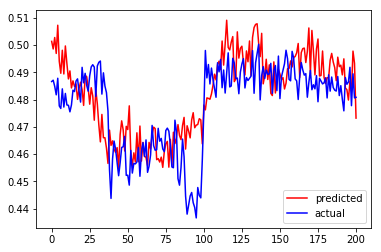

In [16]:
num = 1400
plt.plot(model.predict(X_train[num:num+1])[0],color='r',label='predicted')
plt.plot(y_train[num:num+1][0],color='b',label='actual')
plt.legend()

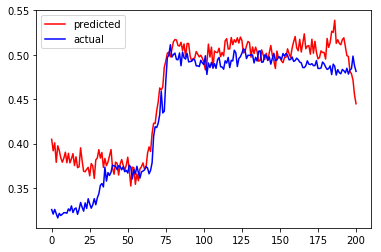

In [17]:
num = 200
plt.plot(model.predict(X_test[num:num+1])[0],color='r',label='predicted')
plt.plot(y_test[num:num+1][0],color='b',label='actual')
plt.legend()